# African Soil Property Prediction Challenge 

## 0. Description

Advances in rapid, low cost analysis of soil samples using infrared spectroscopy, georeferencing of soil samples, and greater availability of earth remote sensing data provide new opportunities for predicting soil functional properties at unsampled locations. Soil functional properties are those properties related to a soil’s capacity to support essential ecosystem services such as primary productivity, nutrient and water retention, and resistance to soil erosion.

Diffuse reflectance infrared spectroscopy has shown potential in numerous studies to provide a highly repeatable, rapid and low cost measurement of many soil functional properties. The amount of light absorbed by a soil sample is measured, with minimal sample preparation, at hundreds of specific wavebands across a range of wavelengths to provide an infrared spectrum. The measurement can be typically performed in about 30 seconds, in contrast to conventional reference tests, which are slow and expensive and use chemicals.

This competition asks you to predict 5 target soil functional properties from diffuse reflectance infrared spectroscopy measurements.

## 1. Frame the problem and look at the big picture

* 

## 2. Getting the data

A function for making the data into a DataFrame. 

In [1]:
import pandas as pd

DATA_PATH = "datasets"

def load_data (path=DATA_PATH):
    return pd.read_csv(path)

Let's take a look at the training data.

In [11]:
training = load_data(path = "datasets/training.csv")
training.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,...,-0.646673,1.687734,0.190708,0.056843,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,...,-0.646673,1.687734,0.190708,0.056843,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,...,-0.814516,1.806660,0.190708,0.056843,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,...,-0.814516,1.806660,0.190708,0.056843,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,...,-0.780242,0.430513,0.190708,0.056843,Topsoil,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Columns: 3600 entries, PIDN to Sand
dtypes: float64(3598), object(2)
memory usage: 31.8+ MB


### Explanation of data fields 

SOC, pH, Ca, P, Sand are the five target variables for predictions. The data have been monotonously transformed from the original measurements and thus include negative values. 
* PIDN: unique soil sample identifier
* SOC: Soil organic carbon
* pH: pH values
* Ca: Mehlich-3 extractable Calcium
* P: Mehlich-3 extractable Phosphorus
* Sand: Sand content 
* m7497.96 - m599.76: There are 3,578 mid-infrared absorbance measurements. For example, the "m7497.96" column is the absorbance at wavenumber 7497.96 cm-1. We suggest you to remove spectra CO2 bands which are in the region m2379.76 to m2352.76, but you do not have to.
    Depth: Depth of the soil sample (2 categories: "Topsoil", "Subsoil")

Also included are some potential spatial predictors from remote sensing data sources. Short variable descriptions are provided below and additional descriptions can be found at AfSIS data. The data have been mean centered and scaled.

* BSA: average long-term Black Sky Albedo measurements from MODIS satellite images (BSAN = near-infrared, BSAS = shortwave, BSAV = visible)
* CTI: compound topographic index calculated from Shuttle Radar Topography Mission elevation data
* ELEV: Shuttle Radar Topography Mission elevation data
* EVI: average long-term Enhanced Vegetation Index from MODIS satellite images.
* LST: average long-term Land Surface Temperatures from MODIS satellite images (LSTD = day time temperature, LSTN = night time temperature)
* Ref: average long-term Reflectance measurements from MODIS satellite images (Ref1 = blue, Ref2 = red, Ref3 = near-infrared, Ref7 = mid-infrared)
* Reli: topographic Relief calculated from Shuttle Radar Topography mission elevation data
* TMAP & TMFI: average long-term Tropical Rainfall Monitoring Mission data (TMAP = mean annual precipitation, TMFI = modified Fournier index)


## 3. Discover and Visualize the Data to Gain Insights

Plot histograms of all properties but the spectrums, and caterogical data to get an idea of what the data looks like.

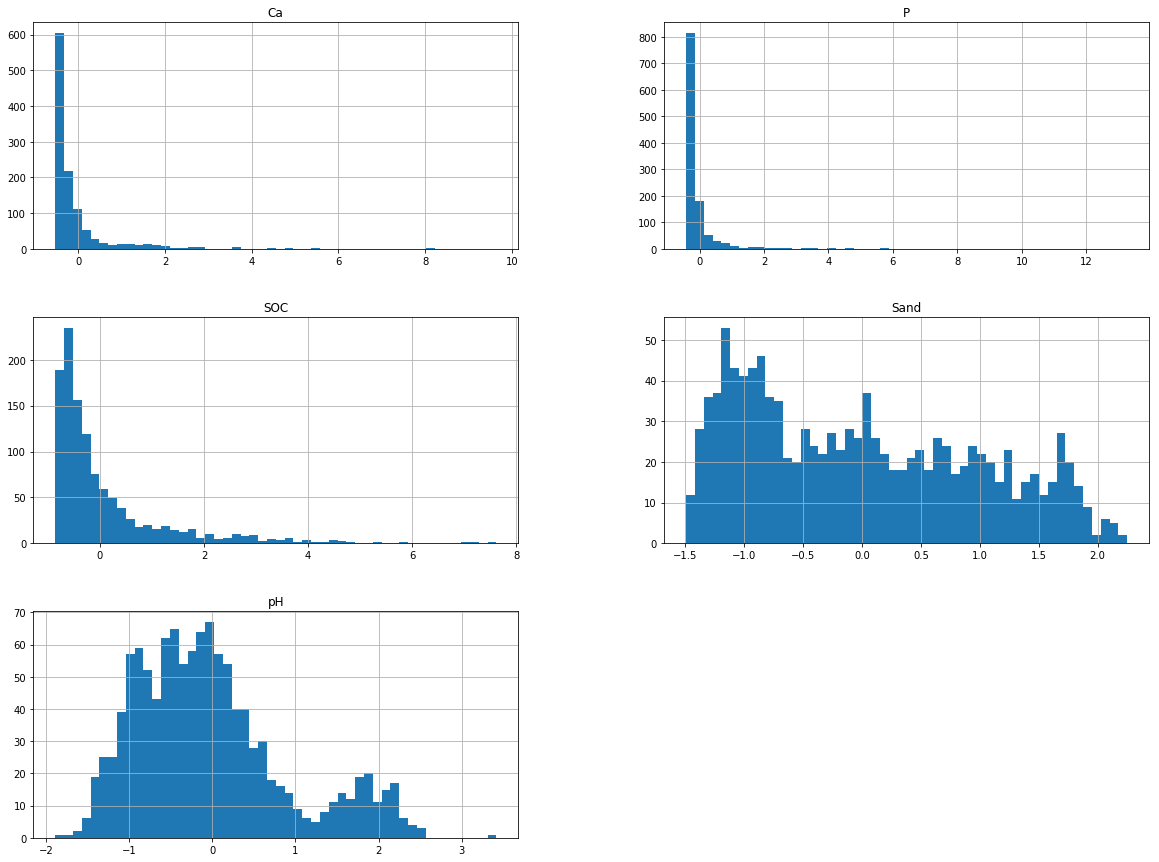

In [14]:
%matplotlib inline 

import matplotlib.pyplot as plt

training.hist (column = ["Ca", "P", "pH", "SOC", "Sand"] , bins=50, figsize=(20, 15))
plt.show()